<a href="https://colab.research.google.com/github/prevencao/trading/blob/master/preco_acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://thecleverprogrammer.com/2020/05/11/stock-price-prediction-with-machine-learning/

---
## ***Previsão do preço das ações com aprendizado de máquina***
---

In [ ]:
#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('dark_background')

In [ ]:
apple = pd.read_csv("drive/My Drive/Colab Notebooks/AAPL.csv")
print(apple.head())

        Date  Open Price  High Price  ...  Close Price  Adj Close Price     Volume
0  5/27/2014   87.982857   89.408569  ...    89.375717        80.948952   87216500
1  5/28/2014   89.431427   89.975716  ...    89.144287        80.739334   78870400
2  5/29/2014   89.692856   90.981430  ...    90.768570        82.210480   94118500
3  5/30/2014   91.139999   92.024284  ...    90.428574        81.902557  141005200
4   6/2/2014   90.565712   90.690002  ...    89.807144        81.339699   92337700

[5 rows x 7 columns]


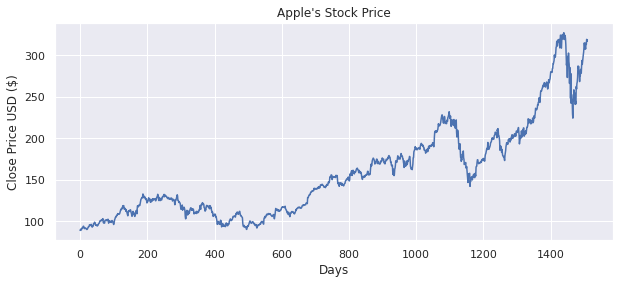

In [ ]:
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close Price"])
plt.show()

In [ ]:
print("trainging days =",apple.shape)

trainging days = (1510, 7)


Visualização dos dados de preço de fechamento

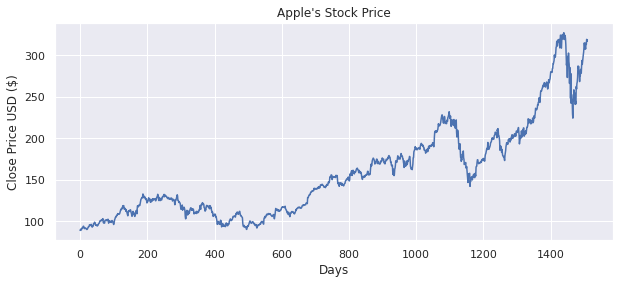

In [ ]:
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(apple['Close Price'])
plt.show()

Obter o preço de fechamento

In [ ]:
apple = apple[['Close Price']]
print(apple.head())

   Close Price
0    89.375717
1    89.144287
2    90.768570
3    90.428574
4    89.807144


Criação de uma variável para prever ‘X’ dias no futuro

In [ ]:
futureDays = 25

Crie uma nova coluna de destino deslocada em unidades / dias de ‘X’:

In [ ]:
apple['Prediction'] = apple[['Close Price']].shift(-futureDays)
print(apple.head())
print (apple.tail())

   Close Price  Prediction
0    89.375717   93.519997
1    89.144287   93.480003
2    90.768570   94.029999
3    90.428574   95.970001
4    89.807144   95.349998
      Close Price  Prediction
1505   314.959991         NaN
1506   313.140015         NaN
1507   319.230011         NaN
1508   316.850006         NaN
1509   318.890015         NaN


Para criar um conjunto de dados de recursos (x) e converter em uma matriz numpy e remover as últimas ‘x’ linhas / dias

In [ ]:
x = np.array(apple.drop(['Prediction'], 1)) [:-futureDays]
print (x)

[[ 89.375717]
 [ 89.144287]
 [ 90.76857 ]
 ...
 [284.429993]
 [286.690002]
 [282.799988]]


Para criar um conjunto de dados de destino (y) e convertê-lo em uma matriz numpy e obter todos os valores de destino, exceto os últimos ‘x’ linhas dias

In [ ]:
y = np.array(apple['Prediction'])[:-futureDays]
print(y)

[ 93.519997  93.480003  94.029999 ... 319.230011 316.850006 318.890015]


Divida os dados em 75% de treinamento e 25% de teste

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

Criando os Modelos

In [ ]:
# Criação do modelo de regressor de árvore de decisão
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

#Criando o modelo de regressão Linear
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)


Para obter os últimos ‘x’ linhas / dias do conjunto de dados do recurso:

In [ ]:
xfuture = apple.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)


Para ver a previsão da árvore modelo

In [ ]:
treePrediction = tree.predict(xfuture)
print ('Decision Tree prediction = ', treePrediction)

Decision Tree prediction =  [276.929993 268.369995 276.100006 275.029999 310.130005 283.170013
 278.579987 275.029999 293.799988 289.070007 282.799988 297.559998
 300.630005 303.73999  310.130005 303.73999  311.410004 291.399994
 309.540009 307.709991 314.959991 313.140015 309.51001  313.140015
 318.890015]


Para ver a previsão de regressão linear do modelo

In [ ]:
linearPrediction = linear.predict(xfuture)
print('Linear Regression Prediction = ', linearPrediction)

Linear Regression Prediction =  [281.59778084 245.84533884 256.49308371 250.30438795 248.41478809
 232.87807592 228.00909439 250.5143506  249.15463682 262.0719063
 251.37416898 258.4426689  257.92277372 244.54561038 248.56475042
 245.04550479 266.10105422 263.06168823 269.70029995 271.61987748
 276.87877664 290.67585028 288.05640859 290.31594031 286.42674782]


Visualize as previsões da árvore de decisão

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


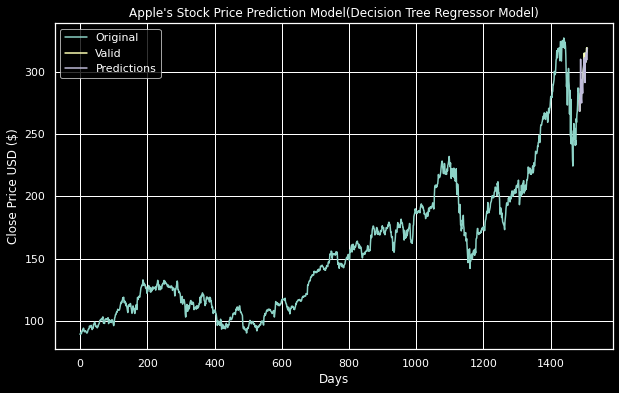

In [ ]:
predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close Price"])
plt.plot(valid[["Close Price", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()


Visualize as previsões do modelo linear

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


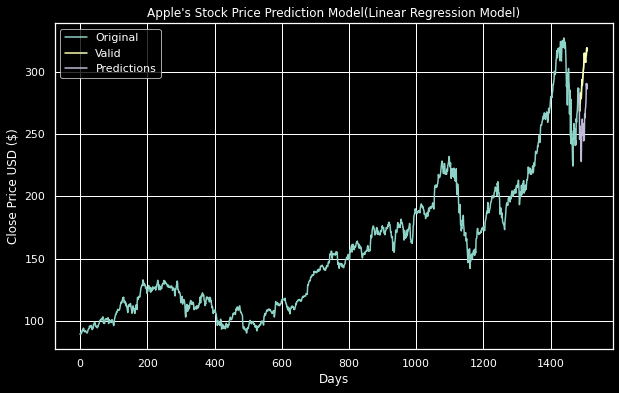

In [ ]:
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close Price"])
plt.plot(valid[["Close Price", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()